In [1]:
# Import the required modules
import numpy as np                # scientific library
from scipy.integrate import solve_ivp
%matplotlib inline
from functools import partial
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import root


## chapter 2 

The Kronauer's model :
\begin{equation}
k^2 \frac{d^2x}{dt^2} +k\mu_x (x^2 -1)\frac{dx}{dt} + \frac{24}{\tau_x} x + k F_{yx} \frac{dy}{dt} =0.\\
k^2 \frac{d^2y}{dt^2} +k\mu_y (y^2 -1)\frac{dy}{dt} + \frac{24}{\tau_y} y + k F_{xy} \frac{dx}{dt} =0.
\end{equation}

using lienard transformation then we have :
\begin{eqnarray*}
\frac{dx}{dt} &=& \epsilon\left(x-\frac{x^3}{3}-p_x\right)\\
\frac{dp_x}{dt} &=&\frac{1}{\epsilon} \left(x+\frac{F_{yx}}{\hat{\omega}_x}y\right)\\
\frac{dy}{dt} &=& \epsilon\left(y-\frac{y^3}{3}-p_y\right)\\
\frac{dp_y}{dt} &=&\frac{1}{\epsilon} \left((1+\epsilon\nu)y+\frac{F_{xy}}{\hat{\omega}_x}x\right).
\end{eqnarray*}

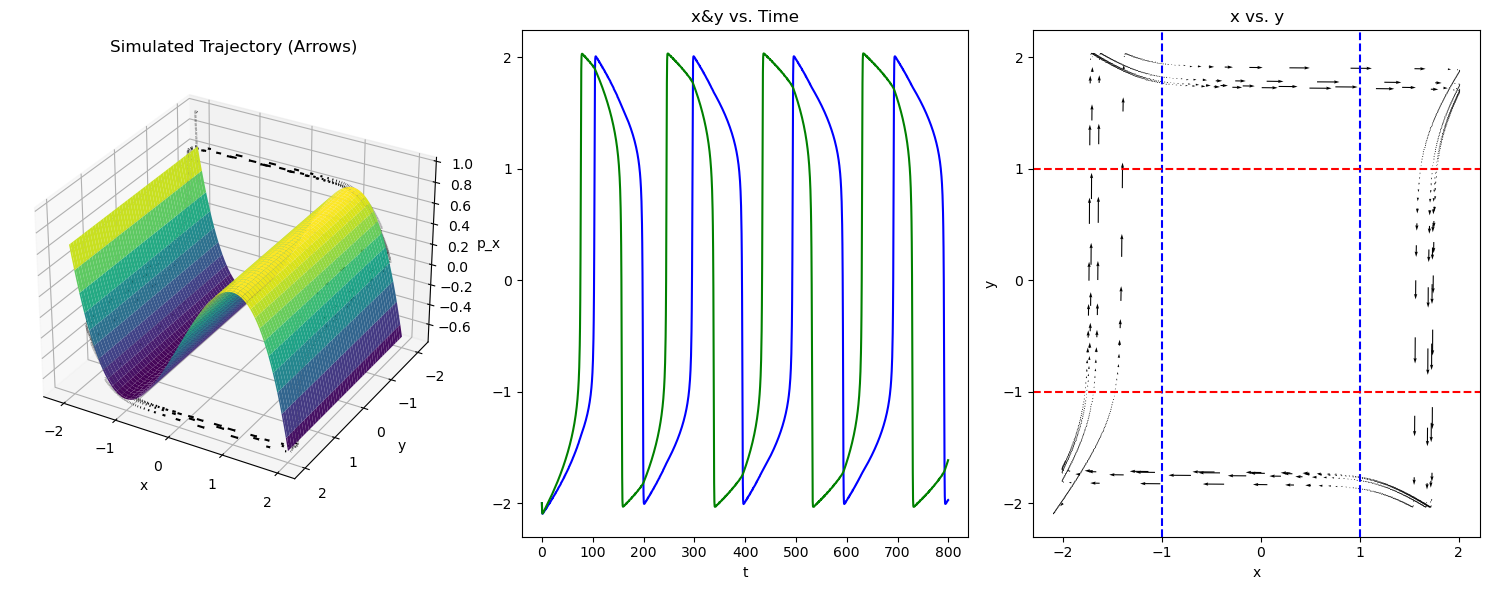

In [2]:
# Define the range of x values
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x_vals, y_vals) 
# Calculate the corresponding p_x values
p_x_vals = x - x**3 / 3
p_y_vals = y - y**3 / 3
# Create a 3D plot
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(131, projection='3d')
# Plot the surface of M1
ax1.plot_surface(x, y, p_x_vals, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('p_x')
ax1.set_title('Plot of p_x')

def coupled_vdp_ode2(t, state, d, F_yx, F_xy,n,  wx):
    x, px, y, py = state

    dx_dt = x-x**3/(3) - px
    dpx_dt = d*(x+F_yx*y/wx)
    dy_dt = y-y**3/(3) - py
    dpy_dt = d*(y+F_xy*x/wx)

    return [dx_dt, dpx_dt, dy_dt, dpy_dt]

# define parameters delta = 0.01
d = 0.01
F_yx = 0.01
F_xy = 0.04
n=0.1
wx=0.1
# define initial conditions
x0 = -2
px0 = 1.0
y0 = -2
py0 = 1.0
initial_state = [x0, px0, y0, py0]
# define time
t_start= 0.0
t_end = 800.0
dt = 0.5
t = np.arange(t_start, t_end, dt)
sol = solve_ivp(lambda t, state: coupled_vdp_ode2(t, state, d, F_yx, F_xy,n,  wx), [t_start, t_end], initial_state, t_eval=t)
x_simulated = sol.y[0]
px_simulated = sol.y[1]
y_simulated = sol.y[2]
py_simulated = sol.y[3]

# Plot the simulated trajectory as arrows
#arrow_scale = 20  # Adjust this value to change the arrow size
ax1.quiver(x_simulated[:-1], y_simulated[:-1], px_simulated[:-1], 
           x_simulated[1:] - x_simulated[:-1], y_simulated[1:] - y_simulated[:-1], 
           px_simulated[1:] - px_simulated[:-1], color='black', 
           length=0.2, arrow_length_ratio=0.1)
# Set labels and title
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('p_x')
ax1.set_title('Simulated Trajectory (Arrows)')
# Add legend
ax1.invert_zaxis()
ax1.view_init(elev=-150, azim=-120)

# Create the second subplot: x vs t
ax2 = fig.add_subplot(132)
ax2.plot(t, x_simulated, 'b-', label='x(t)')
ax2.plot(sol.t, y_simulated, 'g-', label='y(t)')
ax2.set_xlabel('t')
ax2.set_title("x&y vs. Time")

# Create the third subplot: x vs y
ax3 = fig.add_subplot(133)
# Plot the flow vectors (arrows)
ax3.quiver(x_simulated[:-1], y_simulated[:-1], x_simulated[1:] - x_simulated[:-1], y_simulated[1:] - y_simulated[:-1], angles='xy', scale_units='xy', scale=3)
# Add lines at x=-1, x=1, y=-1, y=1
ax3.axvline(x=-1, color='b', linestyle='--', label='x=-1')
ax3.axvline(x=1, color='b', linestyle='--', label='x=1')
ax3.axhline(y=-1, color='r', linestyle='--', label='y=-1')
ax3.axhline(y=1, color='r', linestyle='--', label='y=1')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title("x vs. y")

plt.tight_layout()
plt.show()

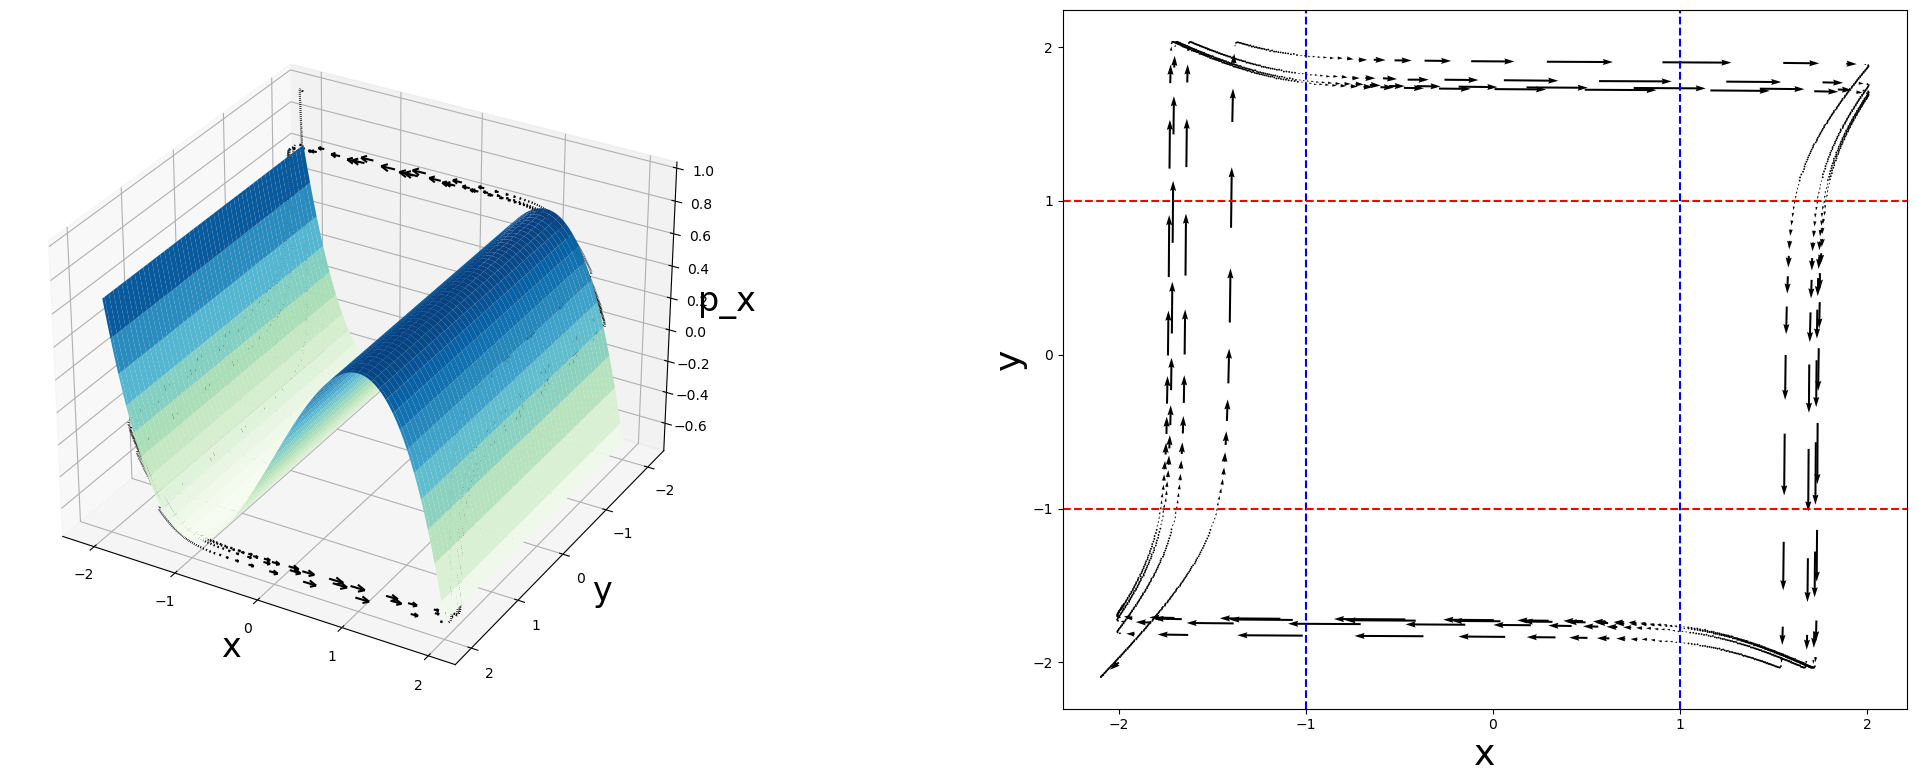

In [3]:
# Define the range of x values
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x_vals, y_vals) 
# Calculate the corresponding p_x values
p_x_vals = x - x**3 / 3
p_y_vals = y - y**3 / 3
# Create a 3D plot
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
# Plot the surface of M1
ax1.plot_surface(x, y, p_x_vals, cmap='GnBu')

def coupled_vdp_ode2(t, state, d, F_yx, F_xy,n,  wx):
    x, px, y, py = state

    dx_dt = x-x**3/(3) - px
    dpx_dt = d*(x+F_yx*y/wx)
    dy_dt = y-y**3/(3) - py
    dpy_dt = d*(y+F_xy*x/wx)

    return [dx_dt, dpx_dt, dy_dt, dpy_dt]

# define parameters delta = 0.01
d = 0.01
F_yx = 0.01
F_xy = 0.04
n=0.1
wx=0.1
# define initial conditions
x0 = -2
px0 = 1.0
y0 = -2
py0 = 1.0
initial_state = [x0, px0, y0, py0]
# define time
t_start= 0.0
t_end = 800.0
dt = 0.5
t = np.arange(t_start, t_end, dt)
sol = solve_ivp(lambda t, state: coupled_vdp_ode2(t, state, d, F_yx, F_xy,n,  wx), [t_start, t_end], initial_state, t_eval=t)
x_simulated = sol.y[0]
px_simulated = sol.y[1]
y_simulated = sol.y[2]
py_simulated = sol.y[3]

# Plot the simulated trajectory as arrows
#arrow_scale = 20  # Adjust this value to change the arrow size
ax1.quiver(x_simulated[:-1], y_simulated[:-1], px_simulated[:-1], 
           x_simulated[1:] - x_simulated[:-1], y_simulated[1:] - y_simulated[:-1], 
           px_simulated[1:] - px_simulated[:-1], color='black', 
           length=0.25, arrow_length_ratio=0.5)
# Set labels and title
ax1.set_xlabel('x', fontsize=24)
ax1.set_ylabel('y', fontsize=24)
ax1.set_zlabel('p_x', fontsize=24)
# Add legend
ax1.invert_zaxis()
ax1.view_init(elev=-150, azim=-120)



# Create the third subplot: x vs y
ax2 = fig.add_subplot(122)
# Plot the flow vectors (arrows)
ax2.quiver(x_simulated[:-1], y_simulated[:-1], x_simulated[1:] - x_simulated[:-1], y_simulated[1:] - y_simulated[:-1], 
           angles='xy', scale_units='xy', scale=1.75)
# Add lines at x=-1, x=1, y=-1, y=1
ax2.axvline(x=-1, color='b', linestyle='--', label='x=-1')
ax2.axvline(x=1, color='b', linestyle='--', label='x=1')
ax2.axhline(y=-1, color='r', linestyle='--', label='y=-1')
ax2.axhline(y=1, color='r', linestyle='--', label='y=1')
ax2.set_xlabel('x', fontsize=26)
ax2.set_ylabel('y', fontsize=26)

subplot_width = 7.5
subplot_height = 6
ax1.set_position([0.1, 0.1, subplot_width / 20, subplot_height / 8])
ax2.set_position([0.5, 0.1, (subplot_width-10) / 20, subplot_height / 8])

plt.tight_layout()
plt.show()

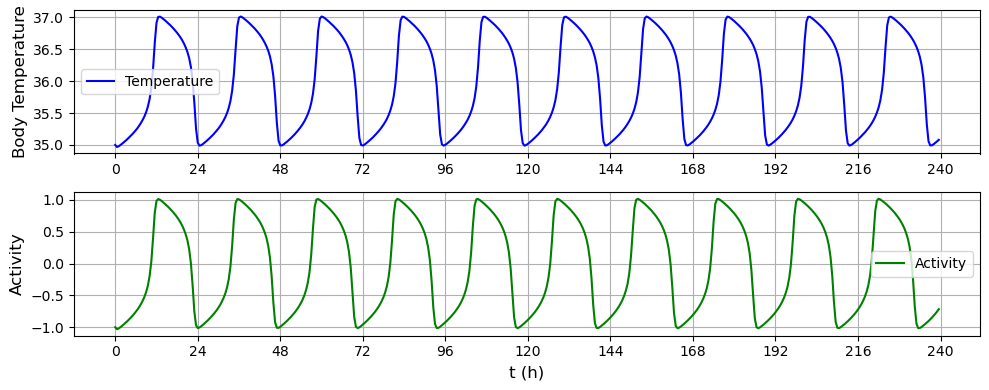

In [4]:
def coupled_vdp_ode2(t, state, d, F_yx, F_xy,n,  wx):
    x, px, y, py = state

    dx_dt = x-x**3/(3) - px
    dpx_dt = d*(x+F_yx*y/wx)
    dy_dt = y-y**3/(3) - py
    dpy_dt = d*(y+F_xy*x/wx)

    return [dx_dt, dpx_dt, dy_dt, dpy_dt]

# define parameters delta = 0.01
d = 0.13
F_yx = 0.001
F_xy = 0.004
n=0.1
wx=0.1
# define initial conditions
x0 = -2
px0 = 1.0
y0 = -2
py0 = 1.0
initial_state = [x0, px0, y0, py0]
# define time
t_start= 0.0
t_end = 240.0
dt = 0.5
t = np.arange(t_start, t_end, dt)
sol = solve_ivp(lambda t, state: coupled_vdp_ode2(t, state, d, F_yx, F_xy,n,  wx), [t_start, t_end], initial_state, t_eval=t)
x_simulated = sol.y[0]
px_simulated = sol.y[1]
y_simulated = sol.y[2]
py_simulated = sol.y[3]

fig, axs = plt.subplots(2, 1, figsize=(10, 4))

x_ticks = np.arange(t_start, t_end + 1, 24)

# First subplot: Body Temperature
axs[0].plot(t, x_simulated * 0.5 + 36, 'b-', label='Temperature')
axs[0].set_ylabel('Body Temperature', fontsize=12)
axs[0].legend()
axs[0].grid(True)
axs[0].set_xticks(x_ticks)

# Second subplot: Activity
axs[1].plot(t, y_simulated * 0.5, 'g-', label='Activity')
axs[1].set_xlabel('t (h)', fontsize=12)
axs[1].set_ylabel('Activity', fontsize=12)
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(x_ticks)

plt.tight_layout()
plt.show()

# chapter 3
## section2

Full order JFK model:
\begin{eqnarray*}
\frac{dn}{dt} &=& 60(\alpha_0 (\frac{I}{I_0})^p (1 - \beta) (1 - n) - \gamma  n)\\
u&=&G \alpha_0 (\frac{I}{I_0})^p (1 - \beta) (1 - n)\\
\frac{dx}{dt} &=&  \frac{\pi}{12}[(x_c + \mu  (\frac{x}{3} + \frac{4}{3}x^3 - \frac{256}{105} x^7 ) + (1 - 0.4 x) (1 - k_c * x_c) u) ]\\
\frac{dx_c}{dt} &=&  \frac{\pi}{12}[(q x_c (1 - 0.4 x) (1 - k_c x_c)  u - (\frac{24}{ 0.99729 \tau_x})^2  x - k_x (1 - 0.4 x) (1 - k_c x_c) u)] .
\end{eqnarray*}

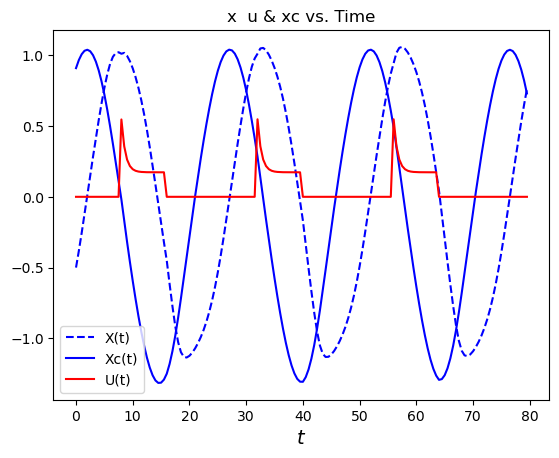

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define 3-dimensional Van der Pol equation
def CR(state, t):
    n, x, xc = state
    a0 = 0.05
    g = 0.0075
    I0 = 9500
    p = 0.5
    mu = 0.13
    q = 1 / 3
    tx = 24.2
    k = 0.55
    kc = 0.4
    G = 33.75

    # the piecewise function for light I(t)
    if t % 24 < 16:
        I = 1000
    else:
        I = 0
    # the piecewise function for the sleep state B(t)
    if t % 24 < 8:
        b = 1
    else:
        b = 0

    dn_dt = 60 * (a0 * (I / I0)**p * (1 - b) * (1 - n) - g * n)
    u = G * a0 * (I / I0)**p * (1 - b) * (1 - n)
    dx_dt = np.pi / 12 * (xc + mu * (x / 3 + 4 * x**3 / 3 - 256 * x**7 / 105) + (1 - 0.4 * x) * (1 - kc * xc) * u)
    dxc_dt = np.pi / 12 * (q * xc * (1 - 0.4 * x) * (1 - kc * xc) * u - (24 / (0.99729 * tx))**2 * x - k * x * (1 - 0.4 * x) * (1 - kc * xc) * u)

    return [dn_dt, dx_dt, dxc_dt]

# Define parameters
t_start = 0  # initial time
t_end = 80  # end time
dt = 0.5  # stepsize

# Initial condtions
n0 = 0.1
x0 = -0.49958105
xc0 = 0.90829892
initial_state = [n0, x0, xc0]

# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states = odeint(CR, initial_state, t)
n_simulated = states[:, 0]
x_simulated = states[:, 1]
xc_simulated = states[:, 2]

# Initialize an array for I(t)
I_values = []
b_values = []
# Iterate through each time value in t
for current_t in t:
    # the piecewise function for light I(t)
    if current_t % 24 < 16:
        I_values.append(1000)
    else:
        I_values.append(0)
        
for current_t in t:        
    # the piecewise function for the sleep state B(t)
    if current_t % 24 < 8:
        b_values.append(1)
    else:
        b_values.append(0)
# Convert the I_values list to a numpy array
I_values = np.array(I_values)
b_values = np.array(b_values)
G = 33.75
a0 = 0.05
I0 = 9500
p = 0.5
# Calculate u_simulated using the I_values array
u_simulated = G * a0 * (I_values / I0)**p * (1 - b_values) * (1 - n_simulated)

# Plot t vs x & xc
plt.plot(t, x_simulated, 'b--', label='X(t)')
plt.plot(t, xc_simulated, 'b', label='Xc(t)')
plt.plot(t, u_simulated, 'r', label='U(t)')
plt.xlabel(r'$t$', fontsize='14')
plt.title("x  u & xc vs. Time")
plt.legend()
plt.show()


Second order JFK model:
\begin{eqnarray*}
\frac{dx}{dt} &=&  \frac{\pi}{12}[(x_c + \mu  (\frac{x}{3} + \frac{4}{3}x^3 - \frac{256}{105} x^7 ) + (1 - 0.4 x) (1 - k_c * x_c) u) ]\\
\frac{dx_c}{dt} &=&  \frac{\pi}{12}[(q x_c (1 - 0.4 x) (1 - k_c x_c)  u - (\frac{24}{ 0.99729 \tau_x})^2  x - k_x (1 - 0.4 x) (1 - k_c x_c) u)] .\\
n &=& \frac{\alpha_0 (\frac{I}{I_0})^p (1 - \beta)}{\alpha_0 (\frac{I}{I_0})^p (1 - \beta)+\gamma} \\
u&=&G \alpha_0 (\frac{I}{I_0})^p (1 - \beta) (1 - n)\\
\end{eqnarray*}

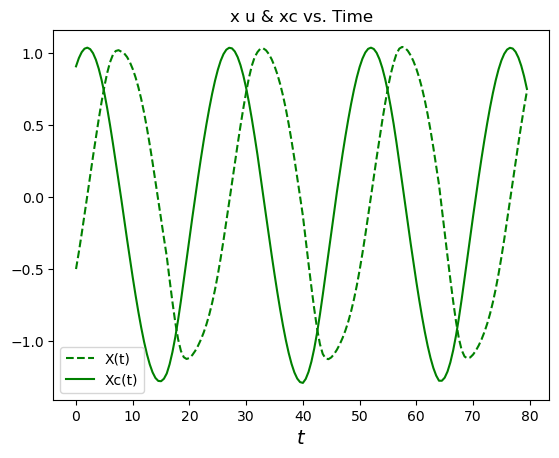

In [6]:
def CR2(state, t):
    x, xc = state
    a0 = 0.05
    g = 0.0075
    I0 = 9500
    p = 0.5
    mu = 0.13
    q = 1/3
    tx = 24.2
    k = 0.55
    kc = 0.4
    G=33.75
    
    # the piecewise function for light I(t)
    if t % 24 < 16:
        I = 1000
    else:
        I = 0
    #the piecewise function for the sleep state B(t)
    if t % 24 <8:
        b=1   
    else:
        b=0
    
    n = a0 * (I / I0)**p * (1 - b) /(a0 * (I / I0)**p * (1 - b)+g)
    u = G * a0 * (I / I0)**p * (1 - b) * (1 - n)
    dx_dt = np.pi / 12 * (xc + mu * (x / 3 + 4 * x**3 / 3 - 256 * x**7 / 105) + (1 - 0.4 * x) * (1 - kc * xc) * u)
    dxc_dt = np.pi / 12 * (q * xc * (1 - 0.4 * x) * (1 - kc * xc) * u - (24 / (0.99729 * tx))**2 * x - k * x * (1 - 0.4 * x) * (1 - kc * xc) * u)
    
    return [ dx_dt, dxc_dt]

# Define parameters
t_start = 0  # initial time
t_end = 80  # end time
dt = 0.5  # stepsize

# Initial condtions
x0 = -0.49958105
xc0 = 0.90829892
initial_state2 = [ x0, xc0]



# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states2 = odeint(CR2, initial_state2, t)
x_simulated2 = states2[:, 0]
xc_simulated2 = states2[:, 1]

# Plot t vs x & xc
plt.plot(t, x_simulated2, 'g--', label='X(t)')
plt.plot(t, xc_simulated2, 'g', label='Xc(t)')
plt.xlabel(r'$t$', fontsize='14')
plt.title("x u & xc vs. Time")
plt.legend()
plt.show()

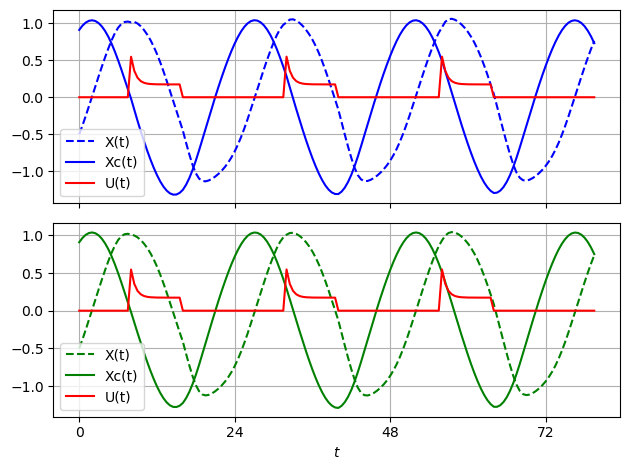

In [7]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x_ticks = np.arange(t_start, t_end + 1, 24)
# Plot for the first subplot
ax1.plot(t, x_simulated, 'b--', label='X(t)')
ax1.plot(t, xc_simulated, 'b', label='Xc(t)')
ax1.plot(t, u_simulated, 'r', label='U(t)')
ax1.grid(True)
ax1.set_xticks(x_ticks)
ax1.legend()

# Plot for the second subplot
ax2.plot(t, x_simulated2, 'g--', label='X(t)')
ax2.plot(t, xc_simulated2, 'g', label='Xc(t)')
ax2.plot(t, u_simulated, 'r', label='U(t)')
ax2.set_xlabel(r'$t$')
ax2.grid(True)
ax2.set_xticks(x_ticks)
ax2.legend()


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


compare two model

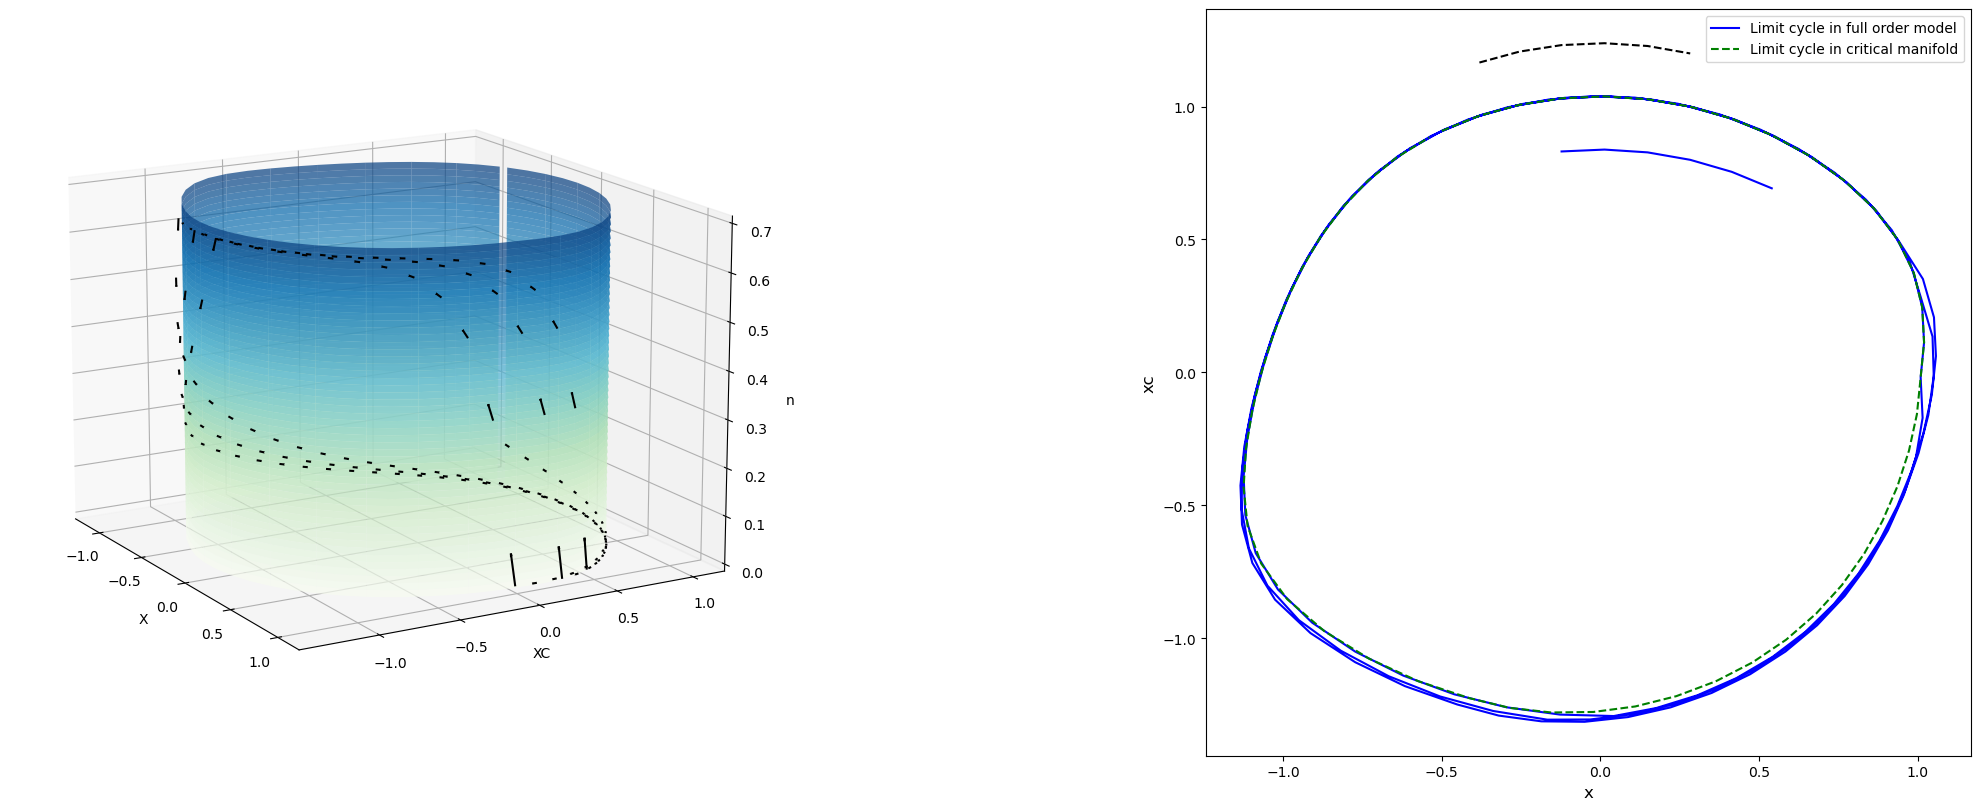

In [23]:
# 定义函数
def f(x, xc):
    a0 = 0.05
    g = 0.0075
    I0 = 9500
    p = 0.5
    
    # the piecewise function for light I(t)
    if t_c[i] % 24 < 16:
        I = 1000
    else:
        I = 0
    #the piecewise function for the sleep state B(t)
    if t_c[i] % 24 <8:
        b=1   
    else:
        b=0
    n = a0 * (1j / I0)**p * (1 - b) / (a0 * (1j / I0)**p * (1 - b) + g)
    u = G * a0 * (1j / I0)**p * (1 - b) * (1 - n)
    dx_dt = np.pi / 12 * (xc + mu * (x / 3 + 4 * x**3 / 3 - 256 * x**7 / 105) + (1 - 0.4 * x) * (1 - kc * xc) * u)
    dxc_dt = np.pi / 12 * (q * xc * (1 - 0.4 * x) * (1 - kc * xc) * u - (24 / (0.99729 * tx))**2 * x - k * x * (1 - 0.4 * x) * (1 - kc * xc) * u)
    return dx_dt, dxc_dt


# Define parameters
t_start = 0  # initial time
t_end = 25.5  # end time
dt = 0.5  # stepsize

# Initial condtions
x0 = -0.49958105
xc0 = 0.90829892
initial_state2 = [x0, xc0]

# Simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
states2 = odeint(CR2, initial_state2, t)
x_simulated2 = states2[:, 0]
xc_simulated2 = states2[:, 1]

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
# Plot the surface of M1
ax1.plot_surface(x, xc, n, cmap='GnBu', alpha=0.7 )

# Plot the simulated trajectory as arrows
#arrow_scale = 20  # Adjust this value to change the arrow size
ax1.quiver(x_simulated[:-1], xc_simulated[:-1], n_simulated[:-1], 
           x_simulated[1:] - x_simulated[:-1], xc_simulated[1:] - xc_simulated[:-1], 
           n_simulated[1:] - n_simulated[:-1], color='black', 
           length=0.2, arrow_length_ratio=0.1)

# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('XC')
ax1.set_zlabel('n')
#ax1.invert_zaxis()
ax1.view_init(elev=15, azim=-30)




# Create the third subplot: x vs y
ax2 = fig.add_subplot(122)
# Plot the full limit cycle in blue and the 2nd order limit cycle in yellow
ax2.plot(x_simulated, xc_simulated, 'b', label='Limit cycle in full order model')
ax2.plot(x_simulated2, xc_simulated2, 'g--', label='Limit cycle in critical manifold')
start_index = 1
start_index2 = 3
# Plot the same segment with an offset in y direction (green, offset added to y coordinates)
offset = 0.2  # Adjust the offset value as needed
ax2.plot(x_simulated[start_index:start_index+6], xc_simulated[start_index:start_index+6] + offset, color='k', linestyle='--')
ax2.plot(x_simulated2[start_index2:start_index2+6], xc_simulated2[start_index2:start_index2+6] - offset, 'b')

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('xc', fontsize=12)
ax2.legend()
plt.tight_layout()

subplot_width = 7.5
subplot_height = 6
ax1.set_position([0.1, 0.1, subplot_width / 20, subplot_height / 8])
ax2.set_position([0.5, 0.1, (subplot_width-10) / 20, subplot_height / 8])

plt.tight_layout()
plt.show()

different region

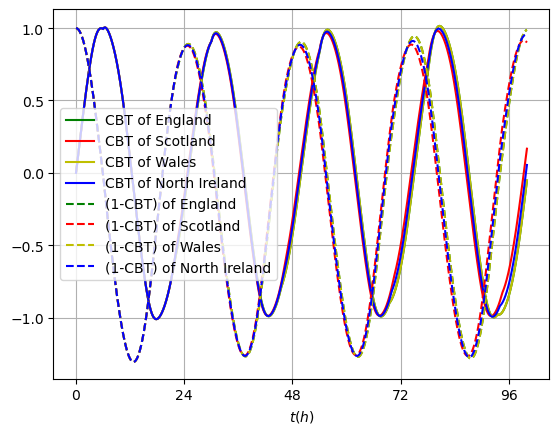

In [41]:
# define 3 dimensional Van der Pol equation
def CR_1(state, t,I0,I1,B0,B1):
    
    n, x, xc = state
    a0 = 0.05
    g = 0.0075
    I0 = 9500
    p = 0.5
    mu = 0.13
    q = 1 / 3
    tx = 24.2
    k = 0.55
    kc = 0.4
    G = 33.75

    # the piecewise function for light I(t)
    if t %  24 > I0 or t % 24 < I1:
        I = 1000
    else:
        I = 0
    # the piecewise function for the sleep state B(t)
    if t % 24 < B0 or t % 24 > B1:
        b = 1
    else:
        b = 0

    dn_dt = 60 * (a0 * (I / I0)**p * (1 - b) * (1 - n) - g * n)
    u = G * a0 * (I / I0)**p * (1 - b) * (1 - n)
    dx_dt = np.pi / 12 * (xc + mu * (x / 3 + 4 * x**3 / 3 - 256 * x**7 / 105) + (1 - 0.4 * x) * (1 - kc * xc) * u)
    dxc_dt = np.pi / 12 * (q * xc * (1 - 0.4 * x) * (1 - kc * xc) * u - (24 / (0.99729 * tx))**2 * x - k * x * (1 - 0.4 * x) * (1 - kc * xc) * u)

  
    
    return [dn_dt, dx_dt, dxc_dt]

# define parameters
t_start = 0  # initial time
t_end = 100  # end time
dt = 0.01  # stepsize

# initial condtions
n0 = 0.1
x0 = 0
xc0 = 1
initial_state = [n0, x0, xc0]

# simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
# england adult in summer
extra_args_e = (5, 21.5, 6, 23)
# scotland adult in summer
extra_args_s = (5, 22.5, 6, 23)
# wales adult in summer
extra_args_w = (5, 21.5, 6, 23)
# north ireland adult in summer
extra_args_n = (5, 22, 6, 23)


# England
states_e = odeint(CR_1, initial_state, t, args=extra_args_e)
n_simulated_e = states_e[:, 0]
x_simulated_e = states_e[:, 1]
xc_simulated_e = states_e[:, 2]

# Scotland
states_s = odeint(CR_1, initial_state, t, args=extra_args_s)
n_simulated_s = states_s[:, 0]
x_simulated_s = states_s[:, 1]
xc_simulated_s = states_s[:, 2]

# Wales
states_w = odeint(CR_1, initial_state, t, args=extra_args_w)
n_simulated_w = states_w[:, 0]
x_simulated_w = states_w[:, 1]
xc_simulated_w = states_w[:, 2]

# North Ireland
states_n = odeint(CR_1, initial_state, t, args=extra_args_n)
n_simulated_n = states_n[:, 0]
x_simulated_n = states_n[:, 1]
xc_simulated_n = states_n[:, 2]


x_ticks = np.arange(t_start, t_end + 1, 24)
plt.plot(t, x_simulated_e, 'g', label='CBT of England')
plt.plot(t, x_simulated_s, 'r', label='CBT of Scotland')
plt.plot(t, x_simulated_w, 'y', label='CBT of Wales')
plt.plot(t, x_simulated_n, 'b', label='CBT of North Ireland')
plt.plot(t, xc_simulated_e, 'g--', label='(1-CBT) of England')
plt.plot(t, xc_simulated_s, 'r--', label='(1-CBT) of Scotland')
plt.plot(t, xc_simulated_w, 'y--', label='(1-CBT) of Wales')
plt.plot(t, xc_simulated_n, 'b--', label='(1-CBT) of North Ireland')
plt.xlabel(r'$t(h)$')
plt.legend()
plt.grid(True)
plt.xticks(x_ticks)
plt.show()


different age group

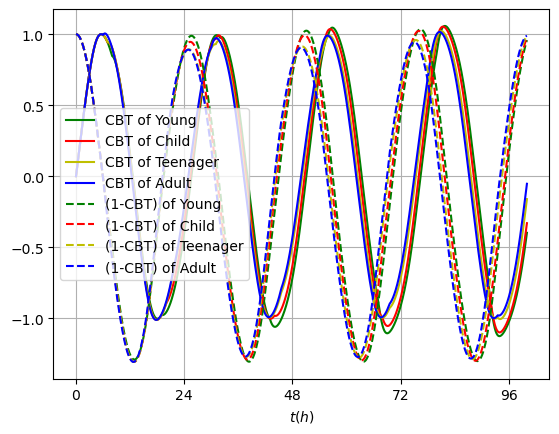

In [43]:
# England young children in summer
extra_args_young = (5, 21.5, 8, 19)
# England children in summer
extra_args_child = (5, 21.5, 7, 20)
# England teenagers in summer
extra_args_teen = (5, 21.5, 7, 22)
# England adults in summer
extra_args_adult = (5, 21.5, 6, 23)


# Young children
states_young = odeint(CR_1, initial_state, t, args=extra_args_young)
n_simulated_young = states_young[:, 0]
x_simulated_young = states_young[:, 1]
xc_simulated_young = states_young[:, 2]

# Children
states_child = odeint(CR_1, initial_state, t, args=extra_args_child)
n_simulated_child = states_child[:, 0]
x_simulated_child = states_child[:, 1]
xc_simulated_child = states_child[:, 2]

# Teenagers
states_teen = odeint(CR_1, initial_state, t, args=extra_args_teen)
n_simulated_teen = states_teen[:, 0]
x_simulated_teen = states_teen[:, 1]
xc_simulated_teen = states_teen[:, 2]

# Adults
states_adult = odeint(CR_1, initial_state, t, args=extra_args_adult)
n_simulated_adult = states_adult[:, 0]
x_simulated_adult = states_adult[:, 1]
xc_simulated_adult = states_adult[:, 2]


x_ticks = np.arange(t_start, t_end + 1, 24)
plt.plot(t, x_simulated_young, 'g', label='CBT of Young')
plt.plot(t, x_simulated_child, 'r', label='CBT of Child')
plt.plot(t, x_simulated_teen, 'y', label='CBT of Teenager')
plt.plot(t, x_simulated_adult, 'b', label='CBT of Adult')
plt.plot(t, xc_simulated_young, 'g--', label='(1-CBT) of Young')
plt.plot(t, xc_simulated_child, 'r--', label='(1-CBT) of Child')
plt.plot(t, xc_simulated_teen, 'y--', label='(1-CBT) of Teenager')
plt.plot(t, xc_simulated_adult, 'b--', label='(1-CBT) of Adult')
plt.xlabel(r'$t(h)$')
plt.legend()
plt.grid(True)
plt.xticks(x_ticks)
plt.show()


# chapter 4
the model of Wake/NREM/REM Cycling:
$$
\frac{d f_W}{d t}=\frac{W_{\infty}\left(g_{A C h, W} C_{A C h}\left(f_R\right)+g_{S, W} C_S\left(f_{S C N}\right)-g_{G, W} C_G\left(f_N\right)\right)-f_W}{\tau_W}
$$
$$
\frac{d f_N}{d t}=\frac{N_{\infty}\left(-g_{N E, N} C_{N E}\left(f_W\right)-g_{S, N} C_S\left(f_{S C N}\right)-g_{G, N} C_G\left(f_N\right)\right)-f_N}{\tau_N}
$$
$$
\frac{d f_R}{d t}=\frac{R_{\infty}\left(g_{A C h, R} C_{A C h}\left(f_R\right)-g_{N E, R} C_{N E}\left(f_W\right)-g_{S, R} C_S\left(f_{S C N}\right)-g_{G, R} C_G\left(f_N\right)\right)-f_R}{\tau_R}
$$
$$
\frac{d f_{S C N}}{d t}=\frac{S C N_{\infty}(c(t))-f_{S C N}}{\tau_{S C N}}
$$
$$
\frac{d h}{d t}=\frac{\mathcal{H}\left(f_W-\theta_W\right) \cdot\left(h_{\max }-h\right)}{\chi \tau_{h w}}+\frac{\mathcal{H}\left(\theta_W-f_W\right) \cdot\left(h_{\min }-h\right)}{\chi \tau_{h s}}
$$

In [101]:
# Define the sleep-wake model
def swmodel( state, t,I0,I1,B0,B1):
    
    c, xc, f_W, f_N, f_R, f_SCN, h = state
    a0 = 0.05; g = 0.0075; I0 = 9500; p = 0.6; mu = 0.13; q = 1/3; tx = 24.2; k = 0.55; kc = 0.4; G = 19.875
    
    # the piecewise function for light I(t)
    if t % 24 > I0 or t % 24 < I1:
        I = 9500
    else:
        I = 0
    #the piecewise function for the sleep state B(t)
    if t % 24 < B0 or t % 24 > B1:
        b=1
    else:
        b=0
    
    n = a0 * (I / I0)**p * (1 - b) /(a0 * (I / I0)**p * (1 - b)+g)
    B = (1 - 0.4 * c) * (1 - kc * xc) * G * a0 * (I / I0)**p * (1 - b) * (1 - n)
    dc_dt = np.pi / 720 * (xc  + B)
    dxc_dt = np.pi / 720 * (mu * (xc - (4*xc**3)/3) - ((24 / (0.99729 * tx))**2  + k * B)* c)
    
    b_W=-0.4
    b_R=-0.8
    b_SCN=-0.1
    a_W=0.4
    a_N=0.2
    a_R=0.1
    a_SCN=0.7 
    W_max = 6.0  
    N_max = 5.0  
    R_max = 5.0  
    SCN_max = 7.0  
    h_max = 323.88  
    h_min = 0.0  
    theta_W = 2 
    tau_W = 23.0  
    tau_N = 10.0  
    tau_R = 1.0  
    tau_SCN = 0.5  
    chi = 1.0  
    tau_hw = 946.8  
    tau_hs = 202.2  
    g_Ach_W = 0.8  
    g_S_W = 0.1911
    g_G_W = 1.4928  
    g_NE_N = 1.5  
    g_S_N = 0.2141  
    g_G_N = 0.0  
    g_Ach_R = 2.2  
    g_NE_R = 10.7473 
    g_S_R = 0.8 
    g_G_R = 1.07  
    gam_Ach = 2.5
    gam_NE = 5
    gam_S = 4
    gam_G = 2.5
    k1=-0.1
    k2=-0.0045

    #(W_max * (0.5*(1+np.tanh(((g_G_W * np.tanh(f_N/gam_G)+g_A_W * np.tanh(f_R/gam_A))- b_W)/a_W)))- f_W) / tau_W
    dfW_dt = (W_max *0.5*(1+np.tanh((g_Ach_W * np.tanh(f_R/gam_Ach) + g_S_W * np.tanh(f_SCN/gam_S) 
                                     - g_G_W * np.tanh(f_N/gam_G)-b_W)/a_W)) - f_W) / tau_W
    
    #(N_max * (0.5*(1+np.tanh(((g_E_N * np.tanh(f_W/gam_E))+k*h)/a_N))) - f_N) / tau_N
    dfN_dt = (N_max *0.5*(1+np.tanh((-g_NE_N * np.tanh(f_W/gam_NE) - g_S_N * np.tanh(f_SCN/gam_S) 
                                     - g_G_N * np.tanh(f_N/gam_G)-k2*h-k1)/a_N)) - f_N) / tau_N
    
    #(R_max * (0.5*(1+np.tanh(((g_E_R * np.tanh(f_W/gam_E) + g_G_R * np.tanh(f_N/gam_G) 
                                        #+ g_A_R * np.tanh(f_R/gam_A))- b_R)/a_R)))-f_R) / tau_R
    dfR_dt = (R_max*0.5 *(1+np.tanh((g_Ach_R * np.tanh(f_R/gam_Ach) - g_NE_R * np.tanh(f_W/gam_NE) 
                                     - g_S_R * np.tanh(f_SCN/gam_S) + g_G_R * np.tanh(f_N/gam_G)-b_R)/a_R)) - f_R) / tau_R
    dfSCN_dt = (SCN_max*0.5*(1+np.tanh((-c-b_SCN)/a_SCN) )- f_SCN) / tau_SCN
    dh_dt = np.heaviside(f_W - theta_W,1) * (h_max - h) / (chi * tau_hw) + np.heaviside(theta_W - f_W, 1) * (h_min - h) / (chi * tau_hs)

    return [dc_dt, dxc_dt, dfW_dt, dfN_dt, dfR_dt, dfSCN_dt, dh_dt]

# Define the time points at which to evaluate the solution
t_start = 0
t_end = 4320
dt = 1
t_points = np.arange(t_start, t_end, dt)  # Replace the time range as needed

# Define the initial conditions
c0 = 0
xc0 = 1
initial_conditions = [c0,xc0,5.4, 0.0, 0.0, 4.0 , 180.0]  # Replace with the appropriate initial values
# simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)




different regions

In [102]:
# england adult in summer
extra_args_e = (5, 21, 6, 23)
# scotland adult in summer
extra_args_s = (5, 22, 6, 23)
# wales adult in summer
extra_args_w = (5, 21, 6, 23)
# north ireland adult in summer
extra_args_n = (5, 23, 6, 23)

# Solve the ODEs numerically
states_e = odeint(swmodel, initial_conditions, t_points, args=extra_args_e)
states_s = odeint(swmodel, initial_conditions, t_points, args=extra_args_s)
states_w = odeint(swmodel, initial_conditions, t_points, args=extra_args_w)
states_n = odeint(swmodel, initial_conditions, t_points, args=extra_args_n)

c_simulated_e, xc_simulated_e, f_W_simulated_e, f_N_simulated_e, f_R_simulated_e, f_SCN_simulated_e, h_simulated_e = states_e[:, 0], states_e[:, 1], states_e[:, 2], states_e[:, 3], states_e[:, 4], states_e[:, 5], states_e[:, 6]
c_simulated_s, xc_simulated_s, f_W_simulated_s, f_N_simulated_s, f_R_simulated_s, f_SCN_simulated_s, h_simulated_s = states_s[:, 0], states_s[:, 1], states_s[:, 2], states_s[:, 3], states_s[:, 4], states_s[:, 5], states_s[:, 6]
c_simulated_w, xc_simulated_w, f_W_simulated_w, f_N_simulated_w, f_R_simulated_w, f_SCN_simulated_w, h_simulated_w = states_w[:, 0], states_w[:, 1], states_w[:, 2], states_w[:, 3], states_w[:, 4], states_w[:, 5], states_w[:, 6]
c_simulated_n, xc_simulated_n, f_W_simulated_n, f_N_simulated_n, f_R_simulated_n, f_SCN_simulated_n, h_simulated_n = states_n[:, 0], states_n[:, 1], states_n[:, 2], states_n[:, 3], states_n[:, 4], states_n[:, 5], states_n[:, 6]


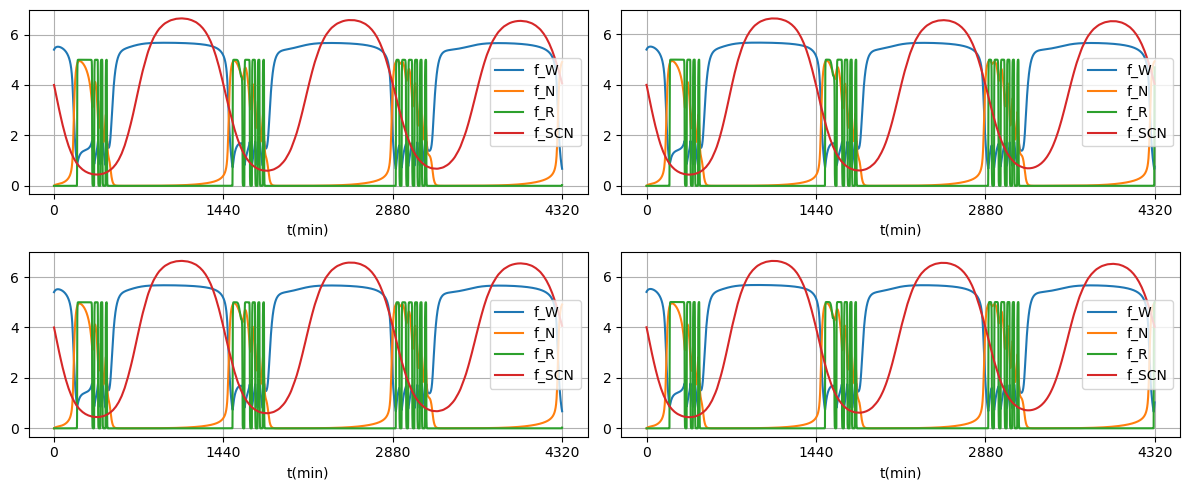

In [103]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Define x_ticks for all subplots
x_ticks = np.arange(t_start, t_end + 1, 1440)

# Plot the results in subplots
axes[0, 0].plot(t_points, f_W_simulated_e, label='f_W')
axes[0, 0].plot(t_points, f_N_simulated_e, label='f_N')
axes[0, 0].plot(t_points, f_R_simulated_e, label='f_R')
axes[0, 0].plot(t_points, f_SCN_simulated_e, label='f_SCN')
axes[0, 0].set_xlabel('t(min)')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xticks(x_ticks)

axes[0, 1].plot(t_points, f_W_simulated_s, label='f_W')
axes[0, 1].plot(t_points, f_N_simulated_s, label='f_N')
axes[0, 1].plot(t_points, f_R_simulated_s, label='f_R')
axes[0, 1].plot(t_points, f_SCN_simulated_s, label='f_SCN')
axes[0, 1].set_xlabel('t(min)')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xticks(x_ticks)

axes[1, 0].plot(t_points, f_W_simulated_w, label='f_W')
axes[1, 0].plot(t_points, f_N_simulated_w, label='f_N')
axes[1, 0].plot(t_points, f_R_simulated_w, label='f_R')
axes[1, 0].plot(t_points, f_SCN_simulated_w, label='f_SCN')
axes[1, 0].set_xlabel('t(min)')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xticks(x_ticks)

axes[1, 1].plot(t_points, f_W_simulated_n, label='f_W')
axes[1, 1].plot(t_points, f_N_simulated_n, label='f_N')
axes[1, 1].plot(t_points, f_R_simulated_n, label='f_R')
axes[1, 1].plot(t_points, f_SCN_simulated_n, label='f_SCN')
axes[1, 1].set_xlabel('t(min)')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xticks(x_ticks)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


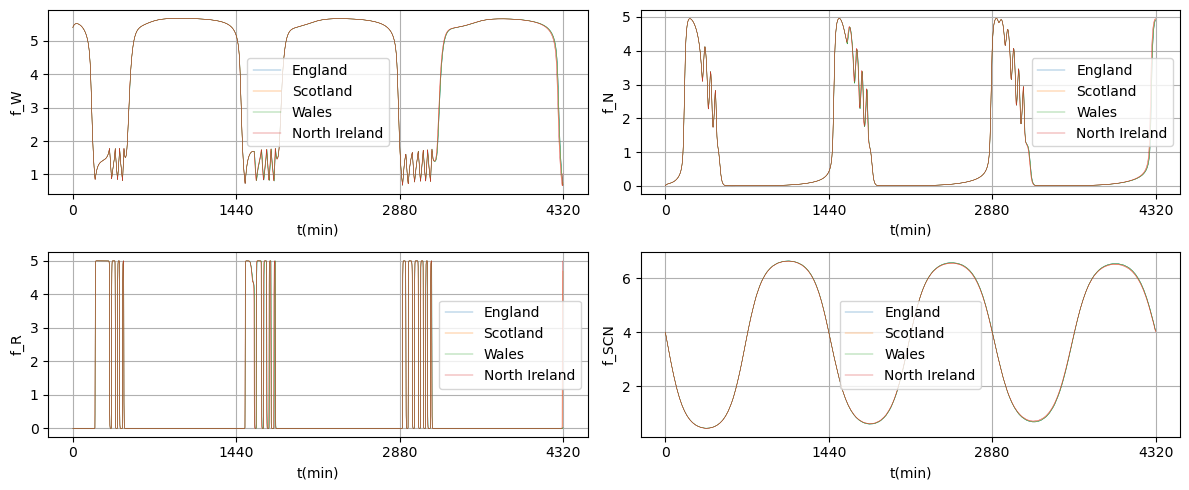

Text(24.140625, 0.5, 'f_W')

In [104]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Define x_ticks for all subplots
x_ticks = np.arange(t_start, t_end + 1, 1440)

# Plot the results in subplots
axes[0, 0].plot(t_points, f_W_simulated_e, label='England',linewidth=0.3)
axes[0, 0].plot(t_points, f_W_simulated_s, label='Scotland',linewidth=0.3)
axes[0, 0].plot(t_points, f_W_simulated_w, label='Wales',linewidth=0.3)
axes[0, 0].plot(t_points, f_W_simulated_n, label='North Ireland',linewidth=0.3)
axes[0, 0].set_xlabel('t(min)')
axes[0, 0].set_ylabel('f_W')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xticks(x_ticks)

axes[0, 1].plot(t_points, f_N_simulated_e, label='England',linewidth=0.3)
axes[0, 1].plot(t_points, f_N_simulated_s, label='Scotland',linewidth=0.3)
axes[0, 1].plot(t_points, f_N_simulated_w, label='Wales',linewidth=0.3)
axes[0, 1].plot(t_points, f_N_simulated_n, label='North Ireland',linewidth=0.3)
axes[0, 1].set_xlabel('t(min)')
axes[0, 1].set_ylabel('f_N')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xticks(x_ticks)

axes[1, 0].plot(t_points, f_R_simulated_e, label='England',linewidth=0.3)
axes[1, 0].plot(t_points, f_R_simulated_s, label='Scotland',linewidth=0.3)
axes[1, 0].plot(t_points, f_R_simulated_w, label='Wales',linewidth=0.3)
axes[1, 0].plot(t_points, f_R_simulated_n, label='North Ireland',linewidth=0.3)
axes[1, 0].set_xlabel('t(min)')
axes[1, 0].set_ylabel('f_R')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xticks(x_ticks)

axes[1, 1].plot(t_points, f_SCN_simulated_e, label='England',linewidth=0.3)
axes[1, 1].plot(t_points, f_SCN_simulated_s, label='Scotland',linewidth=0.3)
axes[1, 1].plot(t_points, f_SCN_simulated_w, label='Wales',linewidth=0.3)
axes[1, 1].plot(t_points, f_SCN_simulated_n, label='North Ireland',linewidth=0.3)
axes[1, 1].set_xlabel('t(min)')
axes[1, 1].set_ylabel('f_SCN')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xticks(x_ticks)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

axes[0, 0].set_ylabel('f_W')

different age groups

In [105]:
# Define parameters for different age groups
extra_args_young = (5, 21.5, 8, 18)
extra_args_child = (5, 21.5, 7, 20)
extra_args_teen = (5, 21.5, 7, 22)
extra_args_adult = (5, 21.5, 5, 24)

# Solve the ODEs numerically for each age group
states_young = odeint(swmodel, initial_conditions, t_points, args=extra_args_young)
states_child = odeint(swmodel, initial_conditions, t_points, args=extra_args_child)
states_teen = odeint(swmodel, initial_conditions, t_points, args=extra_args_teen)
states_adult = odeint(swmodel, initial_conditions, t_points, args=extra_args_adult)

# Extract variables for each age group
c_simulated_young, xc_simulated_young, f_W_simulated_young, f_N_simulated_young, f_R_simulated_young, f_SCN_simulated_young, h_simulated_young = states_young[:, 0], states_young[:, 1], states_young[:, 2], states_young[:, 3], states_young[:, 4], states_young[:, 5], states_young[:, 6]
c_simulated_child, xc_simulated_child, f_W_simulated_child, f_N_simulated_child, f_R_simulated_child, f_SCN_simulated_child, h_simulated_child = states_child[:, 0], states_child[:, 1], states_child[:, 2], states_child[:, 3], states_child[:, 4], states_child[:, 5], states_child[:, 6]
c_simulated_teen, xc_simulated_teen, f_W_simulated_teen, f_N_simulated_teen, f_R_simulated_teen, f_SCN_simulated_teen, h_simulated_teen = states_teen[:, 0], states_teen[:, 1], states_teen[:, 2], states_teen[:, 3], states_teen[:, 4], states_teen[:, 5], states_teen[:, 6]
c_simulated_adult, xc_simulated_adult, f_W_simulated_adult, f_N_simulated_adult, f_R_simulated_adult, f_SCN_simulated_adult, h_simulated_adult = states_adult[:, 0], states_adult[:, 1], states_adult[:, 2], states_adult[:, 3], states_adult[:, 4], states_adult[:, 5], states_adult[:, 6]


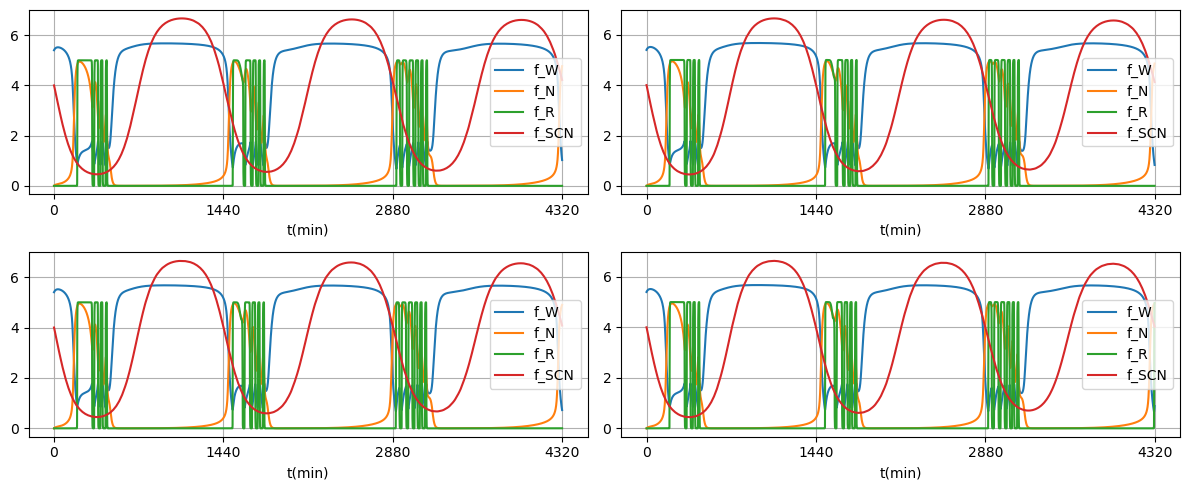

In [106]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Define x_ticks for all subplots
x_ticks = np.arange(t_start, t_end + 1, 1440)

# Plot the results in subplots
axes[0, 0].plot(t_points, f_W_simulated_young, label='f_W')
axes[0, 0].plot(t_points, f_N_simulated_young, label='f_N')
axes[0, 0].plot(t_points, f_R_simulated_young, label='f_R')
axes[0, 0].plot(t_points, f_SCN_simulated_young, label='f_SCN')
axes[0, 0].set_xlabel('t(min)')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xticks(x_ticks)

axes[0, 1].plot(t_points, f_W_simulated_child, label='f_W')
axes[0, 1].plot(t_points, f_N_simulated_child, label='f_N')
axes[0, 1].plot(t_points, f_R_simulated_child, label='f_R')
axes[0, 1].plot(t_points, f_SCN_simulated_child, label='f_SCN')
axes[0, 1].set_xlabel('t(min)')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xticks(x_ticks)

axes[1, 0].plot(t_points, f_W_simulated_teen, label='f_W')
axes[1, 0].plot(t_points, f_N_simulated_teen, label='f_N')
axes[1, 0].plot(t_points, f_R_simulated_teen, label='f_R')
axes[1, 0].plot(t_points, f_SCN_simulated_teen, label='f_SCN')
axes[1, 0].set_xlabel('t(min)')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xticks(x_ticks)

axes[1, 1].plot(t_points, f_W_simulated_adult, label='f_W')
axes[1, 1].plot(t_points, f_N_simulated_adult, label='f_N')
axes[1, 1].plot(t_points, f_R_simulated_adult, label='f_R')
axes[1, 1].plot(t_points, f_SCN_simulated_adult, label='f_SCN')
axes[1, 1].set_xlabel('t(min)')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xticks(x_ticks)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


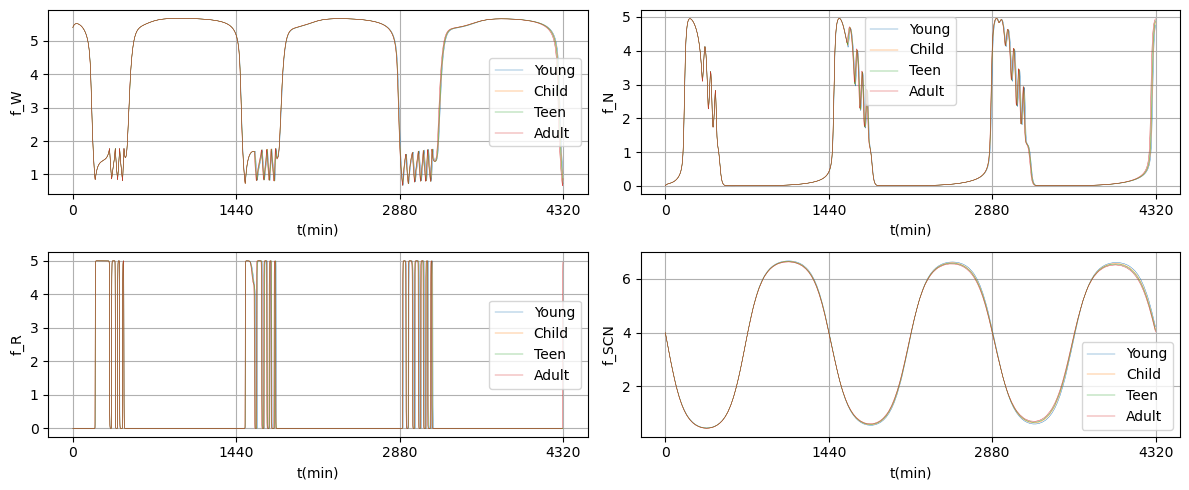

In [107]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Define x_ticks for all subplots
x_ticks = np.arange(t_start, t_end + 1, 1440)

# Plot the results in subplots with updated labels
axes[0, 0].plot(t_points, f_W_simulated_young, label='Young', linewidth=0.3)
axes[0, 0].plot(t_points, f_W_simulated_child, label='Child', linewidth=0.3)
axes[0, 0].plot(t_points, f_W_simulated_teen, label='Teen', linewidth=0.3)
axes[0, 0].plot(t_points, f_W_simulated_adult, label='Adult', linewidth=0.3)
axes[0, 0].set_xlabel('t(min)')
axes[0, 0].set_ylabel('f_W')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xticks(x_ticks)

axes[0, 1].plot(t_points, f_N_simulated_young, label='Young', linewidth=0.3)
axes[0, 1].plot(t_points, f_N_simulated_child, label='Child', linewidth=0.3)
axes[0, 1].plot(t_points, f_N_simulated_teen, label='Teen', linewidth=0.3)
axes[0, 1].plot(t_points, f_N_simulated_adult, label='Adult', linewidth=0.3)
axes[0, 1].set_xlabel('t(min)')
axes[0, 1].set_ylabel('f_N')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xticks(x_ticks)

axes[1, 0].plot(t_points, f_R_simulated_young, label='Young', linewidth=0.3)
axes[1, 0].plot(t_points, f_R_simulated_child, label='Child', linewidth=0.3)
axes[1, 0].plot(t_points, f_R_simulated_teen, label='Teen', linewidth=0.3)
axes[1, 0].plot(t_points, f_R_simulated_adult, label='Adult', linewidth=0.3)
axes[1, 0].set_xlabel('t(min)')
axes[1, 0].set_ylabel('f_R')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xticks(x_ticks)

axes[1, 1].plot(t_points, f_SCN_simulated_young, label='Young', linewidth=0.3)
axes[1, 1].plot(t_points, f_SCN_simulated_child, label='Child', linewidth=0.3)
axes[1, 1].plot(t_points, f_SCN_simulated_teen, label='Teen', linewidth=0.3)
axes[1, 1].plot(t_points, f_SCN_simulated_adult, label='Adult', linewidth=0.3)
axes[1, 1].set_xlabel('t(min)')
axes[1, 1].set_ylabel('f_SCN')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xticks(x_ticks)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


## the sleep wake model without SCN state

\begin{aligned}
F_{W}^{\prime} & =\frac{F_{W \infty}\left(g_{G, W} C_{G \infty}\left(F_{N}\right)+g_{A, W} C_{A \infty}\left(F_{R}\right)\right)-F_{W}}{\tau_{W}} \\
& =\Phi_{W}\left(F_{W}, F_{N}, F_{R}\right),\\
F_{N}^{\prime} & =\frac{F_{N \infty}\left(g_{E, N} C_{E \infty}\left(F_{W}\right)\right)-F_{N}}{\tau_{N}} \\
& =\Phi_{N}\left(F_{W}, F_{N}, h\right),\\
F_{R}^{\prime} & =\frac{F_{R \infty}\left(g_{E, R} C_{E \infty}\left(F_{W}\right)+g_{G, R} C_{G \infty}\left(F_{N}\right)+g_{A, R} C_{A \infty}\left(F_{R}\right)\right)-F_{R}}{\tau_{R}} \\
& =\Phi_{R}\left(F_{W}, F_{N}, F_{R}\right),
\end{aligned}
where $C_{i \infty}(f)=\tanh \left(f / \gamma_{i}\right)$ and $F_{X \infty}(c)=X_{\max }\left(0.5\left(1+\tanh \left(\left(c-\beta_{X}\right) / \alpha_{X}\right)\right)\right)$

Especially, $F_{N \infty}(c)=N_{\max }\left(0.5\left(1+\tanh \left(\left(c-\beta_{N}(h)\right) / \alpha_{N}\right)\right)\right)$
where  $\beta_{N}(h)=-k h$  for constant $ k$ .

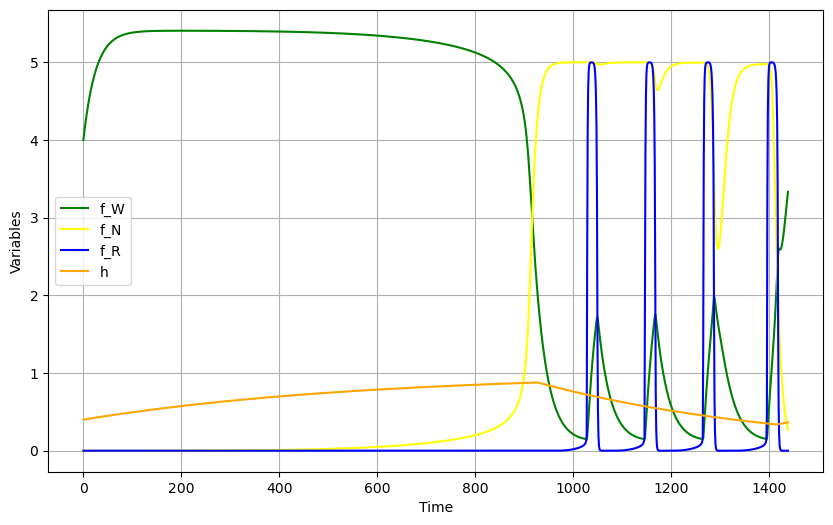

In [109]:
# define sleep-wake model 2
def swmodel2(y, t):
    
    W_max = 6.5 
    N_max = 5.0  
    R_max = 5.0
    g_G_W= -1.68
    g_G_R=-1.3
    gam_E = 5
    gam_G = 4
    gam_A = 2
    tau_hw = 580.5
    a_W = 0.5
    a_N = 0.175
    a_R = 0.13
    g_A_W = 1
    g_A_R = 1.6
    tau_W = 25
    tau_N = 10
    tau_R = 1
    tau_hs = 510
    b_W = -0.4
    k = 1.5
    b_R = -0.9
    g_E_N = -2
    g_E_R = -4
    h_max = 1
    theta_W = 2
    
    f_W, f_N, f_R, h = y

    dfW_dt = (W_max * (0.5*(1+np.tanh(((g_G_W * np.tanh(f_N/gam_G)+g_A_W * np.tanh(f_R/gam_A))- b_W)/a_W)))- f_W) / tau_W
    dfN_dt = (N_max * (0.5*(1+np.tanh(((g_E_N * np.tanh(f_W/gam_E))+k*h)/a_N))) - f_N) / tau_N
    dfR_dt = (R_max * (0.5*(1+np.tanh(((g_E_R * np.tanh(f_W/gam_E) + g_G_R * np.tanh(f_N/gam_G) + g_A_R * np.tanh(f_R/gam_A))- b_R)/a_R)))-f_R) / tau_R
    dh_dt = np.heaviside(f_W - theta_W,1) * (h_max - h) /  tau_hw - np.heaviside(theta_W - f_W, 1) *  h /  tau_hs

    return [dfW_dt, dfN_dt, dfR_dt, dh_dt]

# Define the time points at which to evaluate the solution
t_start = 0
t_end = 1440
dt = 1
t_points = np.arange(t_start, t_end, dt)  # Replace the time range as needed

# Define the initial conditions
initial_conditions = [4.0, 0.0, 0.0, 0.4]  # Replace with the appropriate initial values

# Solve the ODEs numerically
solution = odeint(swmodel2, initial_conditions, t_points)

# Extract the solutions for each variable
f_W_solution = solution[:, 0]
f_N_solution = solution[:, 1]
f_R_solution = solution[:, 2]
h_solution = solution[:, 3]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_points, f_W_solution, color = 'green',label='f_W')
plt.plot(t_points, f_N_solution, color = 'yellow',label='f_N')
plt.plot(t_points, f_R_solution, color = 'blue',label='f_R')
plt.plot(t_points, h_solution, color = 'orange',label='h')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()
plt.grid(True)
plt.show()

# critical manifold

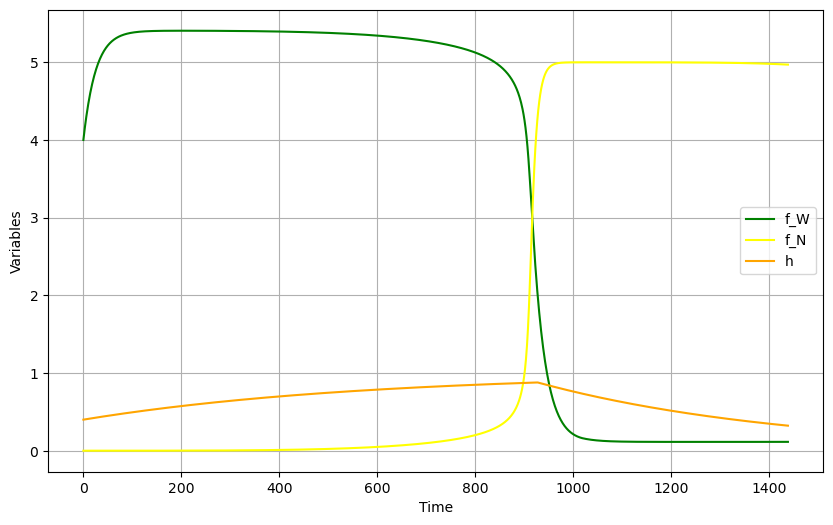

In [110]:
import numpy as np

def swmodel3(y, t):
    W_max = 6.5 
    N_max = 5.0  
    R_max = 5.0
    g_G_W= -1.68
    g_G_R=-1.3
    gam_E = 5
    gam_G = 4
    gam_A = 2
    tau_hw = 580.5
    a_W = 0.5
    a_N = 0.175
    a_R = 0.13
    g_A_W = 1
    g_A_R = 1.6
    tau_W = 25
    tau_N = 10
    tau_R = 1
    tau_hs = 510
    b_W = -0.4
    k = 1.5
    b_R = -0.9
    g_E_N = -2
    g_E_R = -4
    h_max = 1
    theta_W = 2
    
    f_W, f_N, h = y
    def equation_to_solve(f_R):
        return R_max * (0.5 * (1 + np.tanh(((g_E_R * np.tanh(f_W / gam_E) + g_G_R * np.tanh(f_N / gam_G) + g_A_R * np.tanh(f_R / gam_A)) - b_R) / a_R))) - f_R
    
    solution = root(equation_to_solve, x0=0.0)  # 使用0.0作为初始值
    f_R = solution.x[0]
    
    dfW_dt = (W_max * (0.5 * (1 + np.tanh(((g_G_W * np.tanh(f_N / gam_G) + g_A_W * np.tanh(f_R / gam_A)) - b_W) / a_W))) - f_W) / tau_W
    dfN_dt = (N_max * (0.5 * (1 + np.tanh(((g_E_N * np.tanh(f_W / gam_E)) + k * h) / a_N))) - f_N) / tau_N
    dh_dt = np.heaviside(f_W - theta_W, 1) * (h_max - h) / tau_hw - np.heaviside(theta_W - f_W, 1) * h / tau_hs

    return [dfW_dt, dfN_dt, dh_dt]

# Define the time points at which to evaluate the solution
t_start = 0
t_end = 1440
dt = 1
t_points = np.arange(t_start, t_end, dt)  # Replace the time range as needed

# Define the initial conditions
initial_conditions = [4.0, 0.0,  0.4]  # Replace with the appropriate initial values

# Solve the ODEs numerically
solution2 = odeint(swmodel3, initial_conditions, t_points)

# Extract the solutions for each variable
f_W_C_solution = solution2[:, 0]
f_N_C_solution = solution2[:, 1]
h_C_solution = solution2[:, 2]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_points, f_W_C_solution, color = 'green', label='f_W')
plt.plot(t_points, f_N_C_solution, color = 'yellow',label='f_N')
plt.plot(t_points, h_C_solution, color = 'orange',label='h')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()
plt.grid(True)
plt.show()

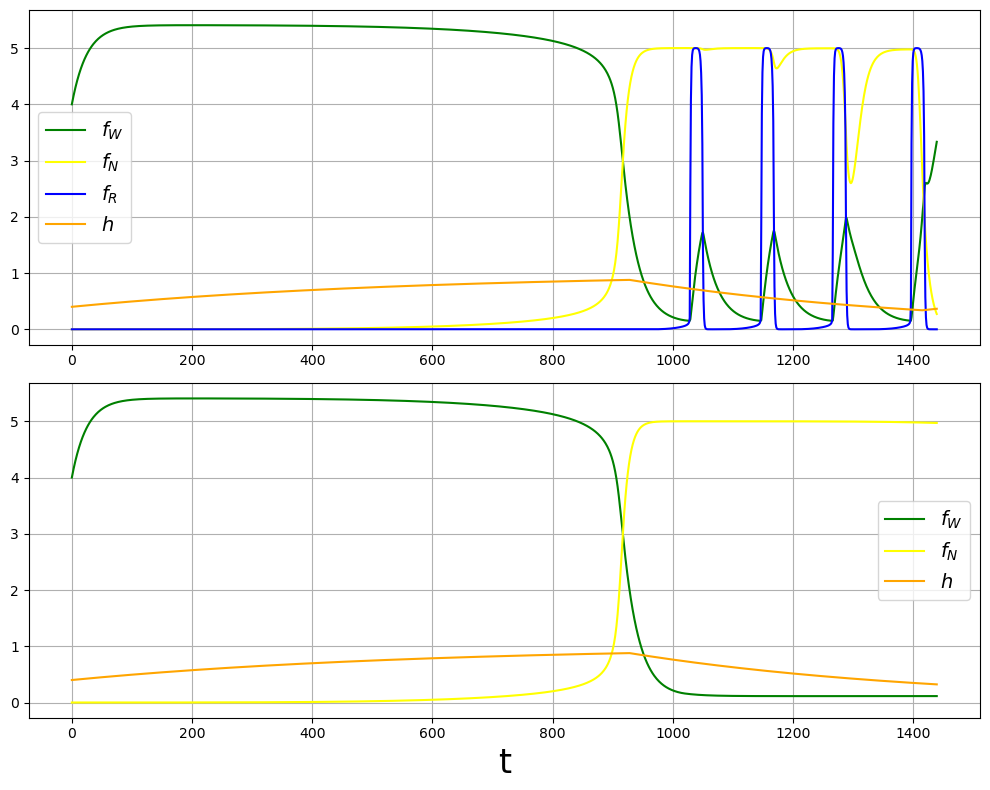

In [111]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for the first subplot
ax1.plot(t_points, f_W_solution, color='green', label='$f_{W}$')
ax1.plot(t_points, f_N_solution, color='yellow', label='$f_{N}$')
ax1.plot(t_points, f_R_solution, color='blue', label='$f_{R}$')
ax1.plot(t_points, h_solution, color='orange', label='$h$')
ax1.legend(fontsize=14) 
ax1.grid(True)

# Plot for the second subplot
ax2.plot(t_points, f_W_C_solution, color='green', label='$f_{W}$')
ax2.plot(t_points, f_N_C_solution, color='yellow', label='$f_{N}$')
ax2.plot(t_points, h_C_solution, color='orange', label='$h$')
ax2.legend(fontsize=14) 
ax2.set_xlabel('t', fontsize=24)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


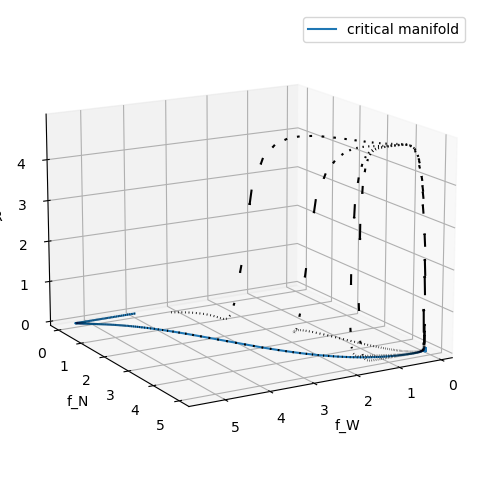

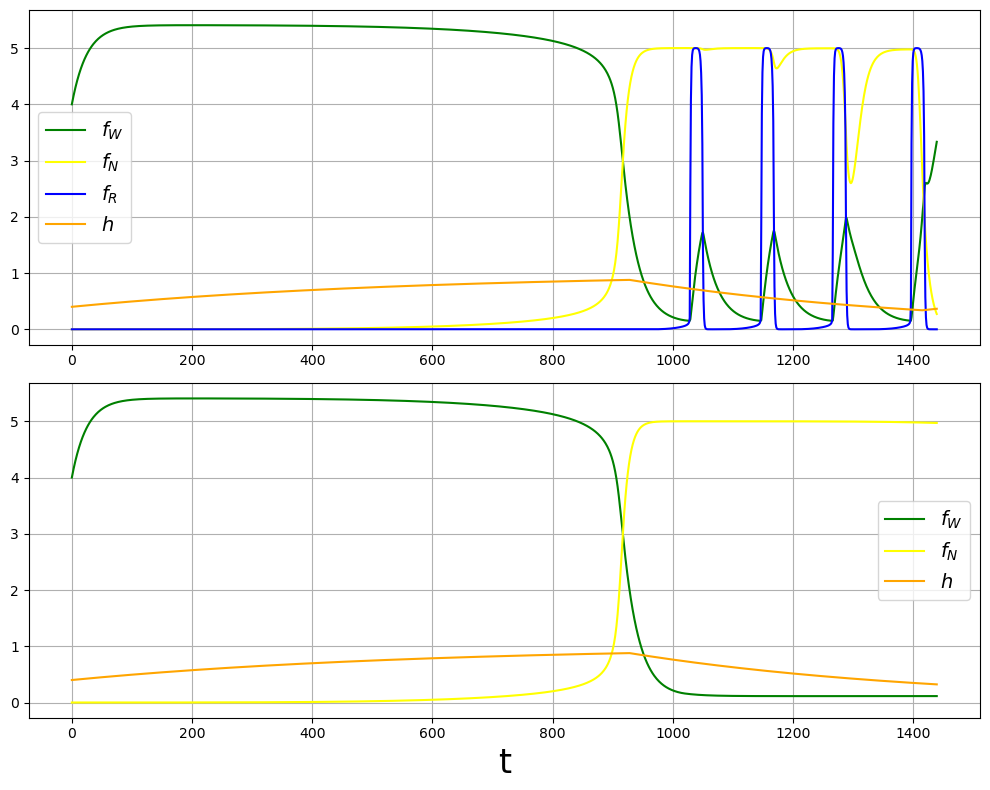

In [112]:
f_R_C_solution = np.zeros_like(f_W_solution)

# Calculate the corresponding f_R values using your swmodel3 function
for i in range(len(f_W_solution)):
    
    def equation_to_solve(f_R, f_W=f_W_solution[i], f_N=f_N_solution[i]):
        R_max = 5.0
        g_G_R = -1.3
        gam_E = 5
        gam_G = 4
        gam_A = 2
        a_R = 0.13
        g_A_R = 1.6
        b_R = -0.9
        g_E_R = -4
        return R_max * (0.5 * (1 + np.tanh(((g_E_R * np.tanh(f_W / gam_E) + g_G_R * np.tanh(f_N / gam_G) + g_A_R * np.tanh(f_R / gam_A)) - b_R) / a_R))) - f_R
    
    solution = root(equation_to_solve, x0=0.0)  # Use 0.0 as the initial value
    f_R_C_solution[i] = solution.x[0]

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory in 3D space
ax.plot(f_W_C_solution, f_N_C_solution, f_R_C_solution, label='critical manifold')

# Plot the simulated trajectory as arrows
#arrow_scale = 20  # Adjust this value to change the arrow size
ax.quiver(f_W_solution[:-1], f_N_solution[:-1], f_R_solution[:-1], 
           f_W_solution[1:] - f_W_solution[:-1], f_N_solution[1:] - f_N_solution[:-1], 
           f_R_solution[1:] - f_R_solution[:-1], color='black', 
           length=0.2, arrow_length_ratio=0.1)

ax.set_xlabel('f_W')
ax.set_ylabel('f_N')
ax.set_zlabel('f_R')
ax.legend()

# Add legend
ax.view_init(elev=15, azim=60)

plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for the first subplot
ax1.plot(t_points, f_W_solution, color='green', label='$f_{W}$')
ax1.plot(t_points, f_N_solution, color='yellow', label='$f_{N}$')
ax1.plot(t_points, f_R_solution, color='blue', label='$f_{R}$')
ax1.plot(t_points, h_solution, color='orange', label='$h$')
ax1.legend(fontsize=14) 
ax1.grid(True)

# Plot for the second subplot
ax2.plot(t_points, f_W_C_solution, color='green', label='$f_{W}$')
ax2.plot(t_points, f_N_C_solution, color='yellow', label='$f_{N}$')
ax2.plot(t_points, h_C_solution, color='orange', label='$h$')
ax2.legend(fontsize=14) 
ax2.set_xlabel('t', fontsize=24)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


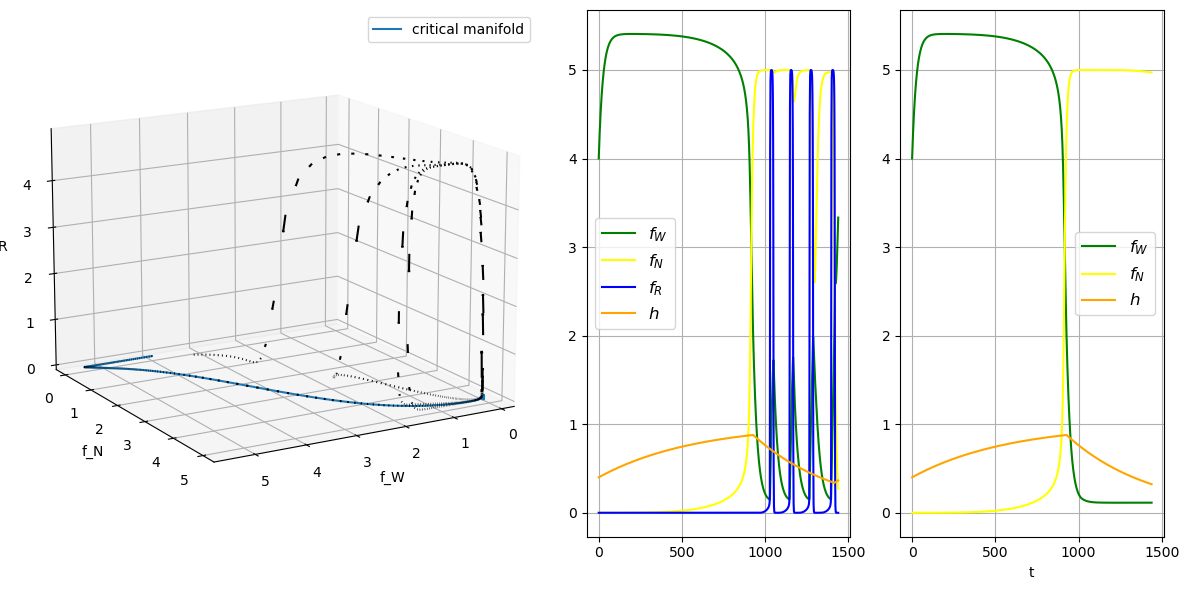

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 1, 1])  # 3 columns: 2 for the left, 1 each for the stacked right subplots

# 3D subplot on the left
ax3d = fig.add_subplot(gs[0], projection='3d')
ax3d.plot(f_W_C_solution, f_N_C_solution, f_R_C_solution, label='critical manifold')
ax3d.quiver(f_W_solution[:-1], f_N_solution[:-1], f_R_solution[:-1], 
           f_W_solution[1:] - f_W_solution[:-1], f_N_solution[1:] - f_N_solution[:-1], 
           f_R_solution[1:] - f_R_solution[:-1], color='black', 
           length=0.2, arrow_length_ratio=0.1)
ax3d.set_xlabel('f_W')
ax3d.set_ylabel('f_N')
ax3d.set_zlabel('f_R')
ax3d.legend()
ax3d.view_init(elev=15, azim=60)

# Stacked subplots on the right
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

# Plot for the first right subplot (ax1)
ax1.plot(t_points, f_W_solution, color='green', label='$f_{W}$')
ax1.plot(t_points, f_N_solution, color='yellow', label='$f_{N}$')
ax1.plot(t_points, f_R_solution, color='blue', label='$f_{R}$')
ax1.plot(t_points, h_solution, color='orange', label='$h$')
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot for the second right subplot (ax2)
ax2.plot(t_points, f_W_C_solution, color='green', label='$f_{W}$')
ax2.plot(t_points, f_N_C_solution, color='yellow', label='$f_{N}$')
ax2.plot(t_points, h_C_solution, color='orange', label='$h$')
ax2.legend(fontsize=12)
ax2.set_xlabel('t')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


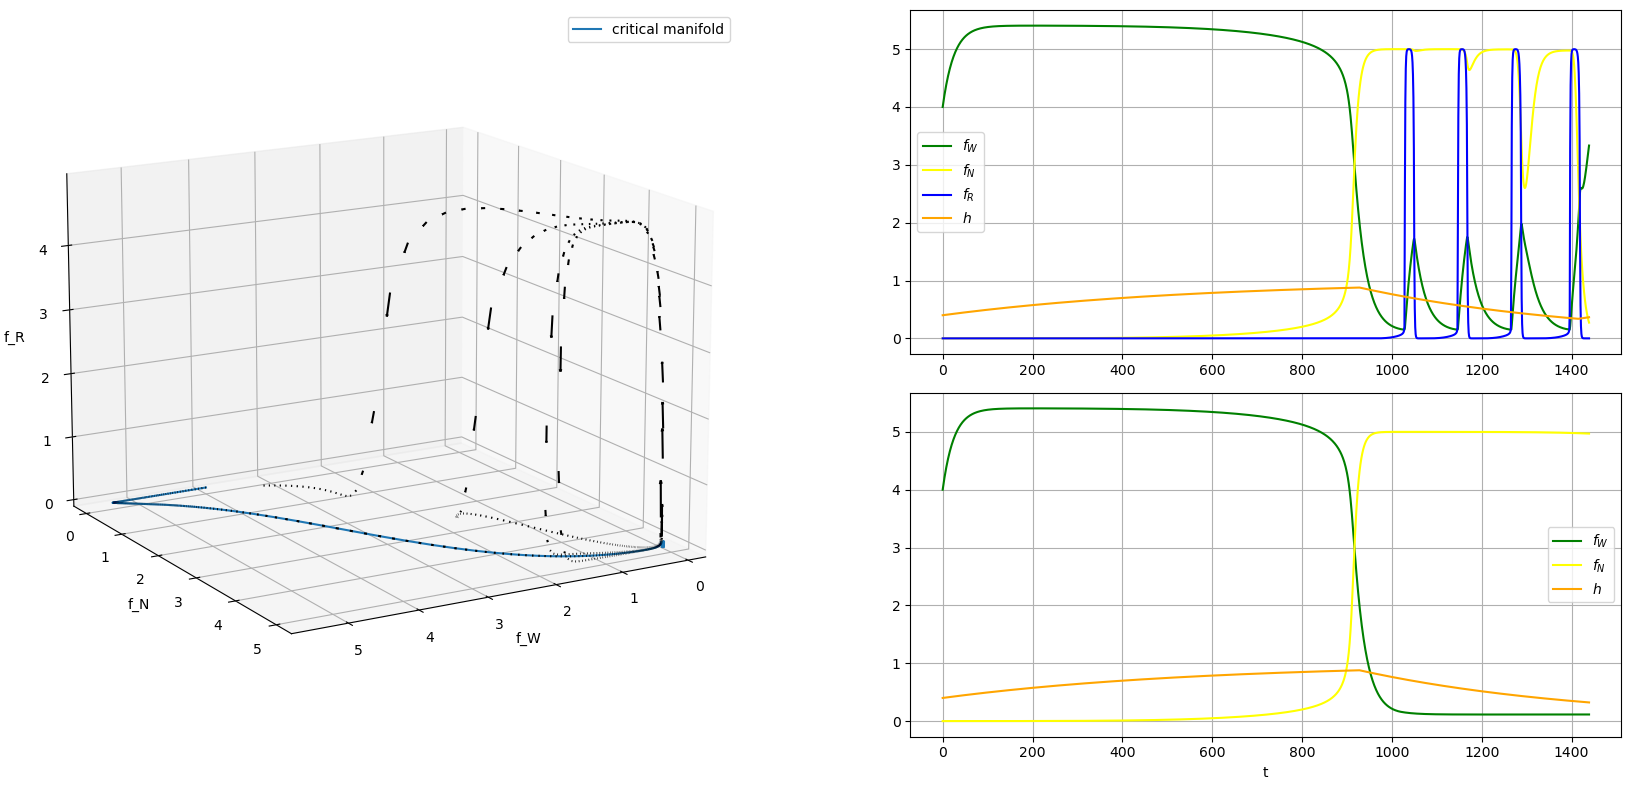

In [125]:
# Create a figure with two subplots: 1x2 grid on the left and 2x1 grid on the right
fig = plt.figure(figsize=(18, 8))
grid = fig.add_gridspec(2, 3, width_ratios=[3, 1, 1], height_ratios=[1, 1])

# 3D plot on the left
ax3d = fig.add_subplot(grid[0:, 0], projection='3d')
ax3d.plot(f_W_C_solution, f_N_C_solution, f_R_C_solution, label='critical manifold')
ax3d.quiver(f_W_solution[:-1], f_N_solution[:-1], f_R_solution[:-1], 
            f_W_solution[1:] - f_W_solution[:-1], f_N_solution[1:] - f_N_solution[:-1], 
            f_R_solution[1:] - f_R_solution[:-1], color='black', 
            length=0.2, arrow_length_ratio=0.1)
ax3d.set_xlabel('f_W')
ax3d.set_ylabel('f_N')
ax3d.set_zlabel('f_R')
ax3d.legend()
ax3d.view_init(elev=15, azim=60)

# Plot on the top-right
ax_top = fig.add_subplot(grid[0, 1:])
ax_top.plot(t_points, f_W_solution, color='green', label='$f_{W}$')
ax_top.plot(t_points, f_N_solution, color='yellow', label='$f_{N}$')
ax_top.plot(t_points, f_R_solution, color='blue', label='$f_{R}$')
ax_top.plot(t_points, h_solution, color='orange', label='$h$')
ax_top.legend(fontsize=10)
ax_top.grid(True)

# Plot on the bottom-right
ax_bottom = fig.add_subplot(grid[1, 1:])
ax_bottom.plot(t_points, f_W_C_solution, color='green', label='$f_{W}$')
ax_bottom.plot(t_points, f_N_C_solution, color='yellow', label='$f_{N}$')
ax_bottom.plot(t_points, h_C_solution, color='orange', label='$h$')
ax_bottom.legend(fontsize=10)
ax_bottom.set_xlabel('t')
ax_bottom.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



3D

C:\Users\s2318048\AppData\Local\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


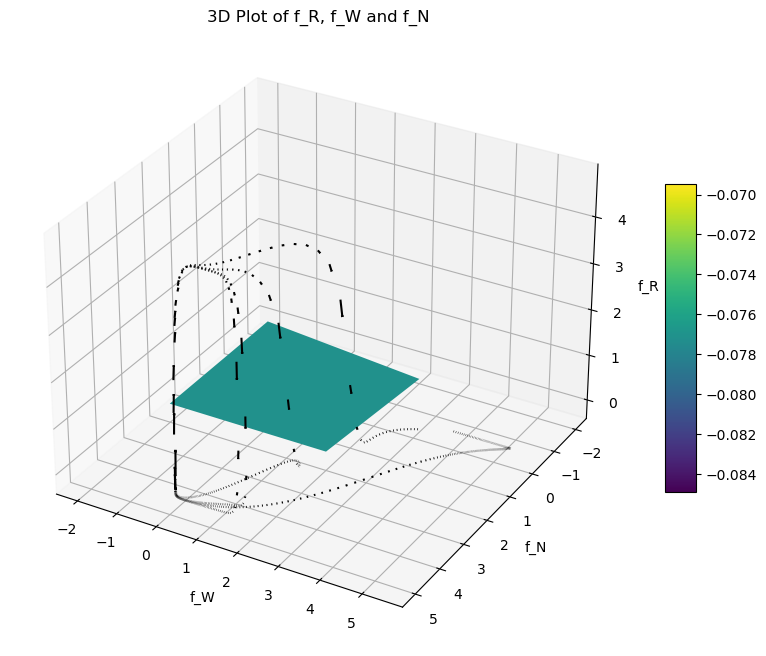

In [113]:
# Define the f_W and f_N values for the grid
f_W_vals = np.linspace(-2, 2, 2)
f_N_vals = np.linspace(-2, 2, 2)
f_W, f_N = np.meshgrid(f_W_vals, f_N_vals)
f_R = np.zeros_like(f_W)


t_start = 0
t_end = 1440
dt = 1
t_points = np.arange(t_start, t_end, dt)

# Calculate the corresponding h values using your swmodel3 function
for i in range(f_W.shape[0]):
    for j in range(f_W.shape[1]):
        y = [f_W[i, j], f_N[i, j], 0.4]  # Use the constant h value of 0.4
        solution = odeint(swmodel3, y, t_points)
        def equation_to_solve(f_R):
            R_max = 5.0
            g_G_R=-1.3
            gam_E = 5
            gam_G = 4
            gam_A = 2
            a_R = 0.13
            g_A_R = 1.6
            b_R = -0.9
            g_E_R = -4
            return R_max * (0.5 * (1 + np.tanh(((g_E_R * np.tanh(f_W[i,j] / gam_E) + g_G_R * np.tanh(f_N[i,j] / gam_G) + g_A_R * np.tanh(f_R / gam_A)) - b_R) / a_R))) - f_R
    solution = root(equation_to_solve, x0=0.0)  # 使用0.0作为初始值
    f_R[i, j] = solution.x[0]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(f_W, f_N, f_R, cmap='viridis')


# Plot the simulated trajectory as arrows
#arrow_scale = 20  # Adjust this value to change the arrow size
ax.quiver(f_W_solution[:-1], f_N_solution[:-1], f_R_solution[:-1], 
           f_W_solution[1:] - f_W_solution[:-1], f_N_solution[1:] - f_N_solution[:-1], 
           f_R_solution[1:] - f_R_solution[:-1], color='black', 
           length=0.2, arrow_length_ratio=0.1)

# Customize the plot
ax.set_xlabel('f_W')
ax.set_ylabel('f_N')
ax.set_zlabel('f_R')
ax.set_title('3D Plot of f_R, f_W and f_N')
# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Add legend
ax.invert_zaxis()
ax.view_init(elev=-150, azim=-120)

plt.show()


In [60]:
def aaa( state, t,I0,I1,B0,B1):
    
    n,  c, xc,  = state
    a0 = 0.05; g = 0.013; I0 = 9500; p = 0.6; mu = 0.13; q = 1/3; tx = 24.2; k = 0.55; kc = 0.4; G = 19.875
    
    # the piecewise function for light I(t)
    if t % 24 > I0 or t % 24 < I1:
        I = 9500
    else:
        I = 0
    #the piecewise function for the sleep state B(t)
    if t % 24 < B0 or t % 24 > B1:
        b=1
    else:
        b=0
    
    dn_dt = a0 * (I / I0)**p  * (1 - n) - g * n
    u = G * a0 * (I / I0)**p  * (1 - n)
    dc_dt = np.pi / 720 * (xc  + (1 - 0.4 * c) * (1 - 0.4* xc) * u)
    dxc_dt = np.pi / 720 * (0.23 * (xc - 4*xc**3/3) - (24 / (0.99729 * tx))**2 * c - k * c * (1 - 0.4 * c) * (1 - 0.4 * xc) * u)
    
    return [dn_dt,dc_dt, dxc_dt,]

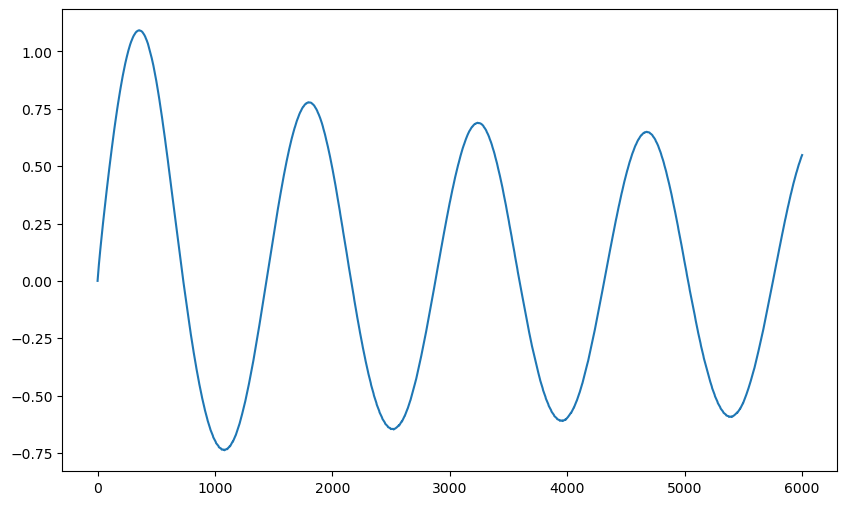

In [63]:

# Define the time points at which to evaluate the solution
t_start = 0
t_end = 6000
dt = 1
t_points = np.arange(t_start, t_end, dt)  # Replace the time range as needed

# Define the initial conditions
n0 = 0
c0 = 0
xc0 = 1
initial_conditions = [n0,c0,xc0]  # Replace with the appropriate initial values

# simulate Van der Pol equation
t = np.arange(t_start, t_end, dt)
# england adult in summer
extra_args_e = (5, 21.5, 6, 23)
# scotland adult in summer
extra_args_s = (5, 22.5, 6, 23)
# wales adult in summer
extra_args_w = (5, 21.5, 6, 23)
# north ireland adult in summer
extra_args_n = (5, 22, 6, 23)

# Solve the ODEs numerically
states_1 = odeint(aaa, initial_conditions, t_points, args=extra_args_e)
n_simulated_e = states_1[:, 0]
c_simulated_e = states_1[:, 1]
xc_simulated_e = states_1[:, 2]


plt.figure(figsize=(10, 6))
plt.plot(t_points, c_simulated_e, label='f_W')
plt.show()
